# Load Data

In this project, I will be conducting an exploratory data analysis (EDA) focused on understanding customer churn in a telecommunications dataset. The primary objective is to uncover insights into the factors influencing customer retention by analyzing various features and their correlations. To begin, I am going to explore the 4 files and analyze the data so that I can devise a plan to move forward.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime

print(os.getcwd())

/app


In [2]:
# Check the dataset folder for all CSV files
dataset_path = '/datasets/final_provider/'

if os.path.exists(dataset_path):
    print("✅ Dataset folder found!")
    print("Available CSV files:")
    csv_files = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]
    for file in csv_files:
        print(f"  📄 {file}")
    print(f"\nTotal CSV files found: {len(csv_files)}")
else:
    print("❌ Dataset folder not found.")

✅ Dataset folder found!
Available CSV files:
  📄 contract.csv
  📄 phone.csv
  📄 personal.csv
  📄 internet.csv

Total CSV files found: 4


In [3]:
# Load datasets
try:
    contract_df = pd.read_csv('/datasets/final_provider/contract.csv')
    personal_df = pd.read_csv('/datasets/final_provider/personal.csv')
    internet_df = pd.read_csv('/datasets/final_provider/internet.csv')
    phone_df = pd.read_csv('/datasets/final_provider/phone.csv')
    
    print("✅ All 4 datasets loaded successfully!")
    print(f"Contract data shape: {contract_df.shape}")
    print(f"Personal data shape: {personal_df.shape}")
    print(f"Internet data shape: {internet_df.shape}")
    print(f"Phone data shape: {phone_df.shape}")
    
except FileNotFoundError as e:
    print(f"❌ Error loading files: {e}")

✅ All 4 datasets loaded successfully!
Contract data shape: (7043, 8)
Personal data shape: (7043, 5)
Internet data shape: (5517, 8)
Phone data shape: (6361, 2)


In [4]:
display(contract_df.head())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [5]:
display(phone_df.head())

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [6]:
display(personal_df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [7]:
display(internet_df.head())

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


# Summary

# Explore Data

In [8]:
display(contract_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

In [9]:
display(contract_df.describe())

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [10]:
display(phone_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

In [11]:
display(phone_df.describe())

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,2674-MLXMN,No
freq,1,3390


In [12]:
display(personal_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

In [13]:
display(personal_df.describe())

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [14]:
display(internet_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

In [15]:
display(internet_df.describe())

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,4910-AQFFX,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


In [16]:
# Find missing values
print(contract_df.isnull().sum())
print(personal_df.isnull().sum())
print(internet_df.isnull().sum())
print(phone_df.isnull().sum())

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64
customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64
customerID       0
MultipleLines    0
dtype: int64


    The contract_df has 7043 rows with 8 columns on customer contracts. Monthly charges average about $64.76 with a wide range, and it includes details like contract types and payment methods, which could be key for churn prediction by identifying trends in billing and tenure.

    The phone_df has 6361 rows with 2 columns on phone services. Most customers (about 53%) do not have multiple lines, which could indicate basic usage patterns relevant to churn analysis.

    The personal_df has 7043 rows with 5 columns on customer details. About 16% of customers are senior citizens (SeniorCitizen = 1), and the data shows a mix of genders and binary features like Partner and Dependents, which could be useful for analyzing churn based on demographics.

    The internet_df has 5517 rows with 8 columns on internet services. Most users (56%) have 'Fiber optic' service, and many (63-65%) skip add-ons like security, which could help predict churn by focusing on upgrades. 

    Overall, there is no missing values in all four dataframes. I am now going to explore the data visually. To do so I will need to merge some of the data while doing so:

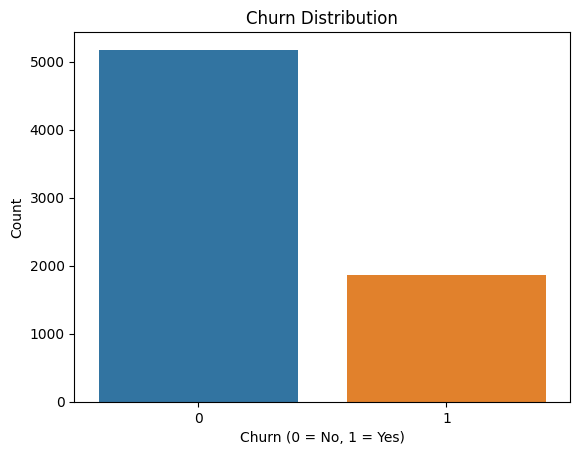

In [17]:
# Create Churn column from EndDate
contract_df['Churn'] = contract_df['EndDate'].apply(lambda x: 0 if x == 'No' else 1)

# Plot the churn distribution
sns.countplot(x='Churn', data=contract_df)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


### Graph 1: Churn Distribution
The chart displays the overall distribution of customer churn, highlighting that non-churning customers (0) vastly outnumber those who churned (1). The visual representation suggests a strong retention rate, with only a small proportion of customers opting to leave the service.


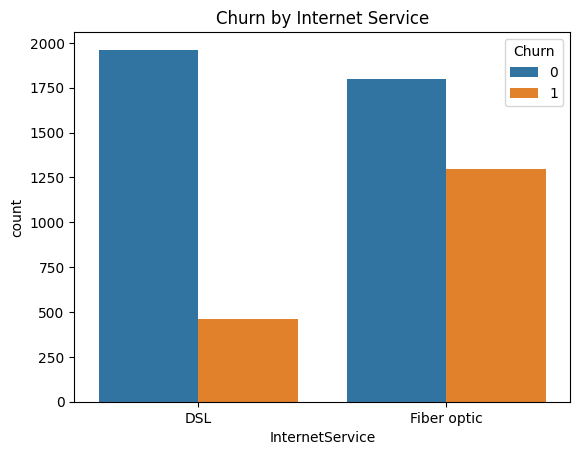

In [18]:
   # First, merge the DataFrames
   merged_df = pd.merge(contract_df, internet_df, on='customerID', how='left')  # Use 'left' to keep all contract data
   
   # Now, create the plot using the merged DataFrame
   sns.countplot(x='InternetService', hue='Churn', data=merged_df)
   plt.title('Churn by Internet Service')
   plt.show()
   

### Graph 2: Churn by Internet Service
This bar chart compares customer churn rates based on the type of internet service, displaying significant differences between DSL and fiber optic services. Customers with DSL show a higher retention rate, while fiber optic service has a noticeably higher churn rate.


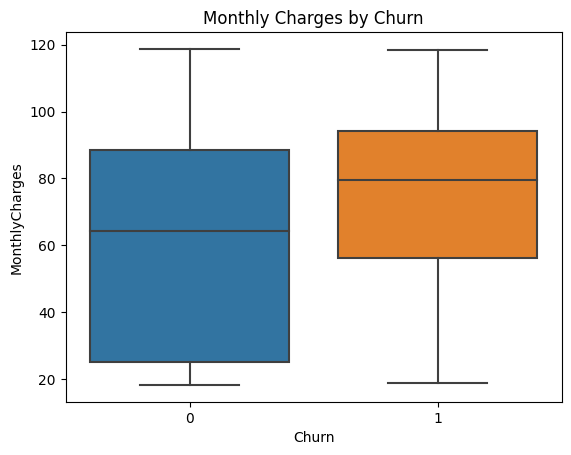

In [19]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=contract_df)
plt.title('Monthly Charges by Churn')
plt.show()

### Graph 3: Monthly Charges by Churn
This box plot illustrates the distribution of monthly charges for customers who have churned (1) versus those who have not (0). The blue box represents low churn customers with a median monthly charge around 65, while the orange box indicates that high churn customers typically have a median charge slightly below 70.

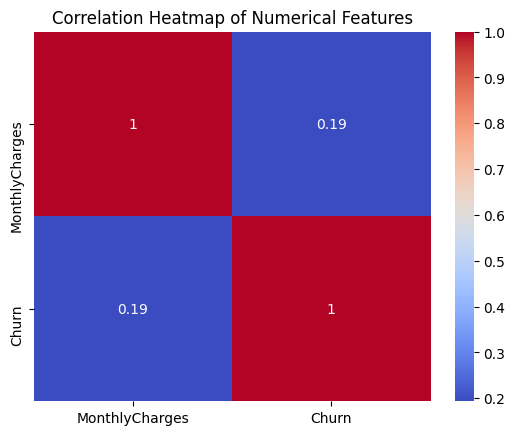

In [20]:
numerical_df = contract_df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
  

### Graph 4: Correlation Heatmap of Numerical Features
The heatmap visually represents the correlation between monthly charges and churn, revealing a weak positive correlation of 0.19. Although there is some relationship between the two variables, it is not strong enough to indicate that monthly charges significantly affect churn behavior.



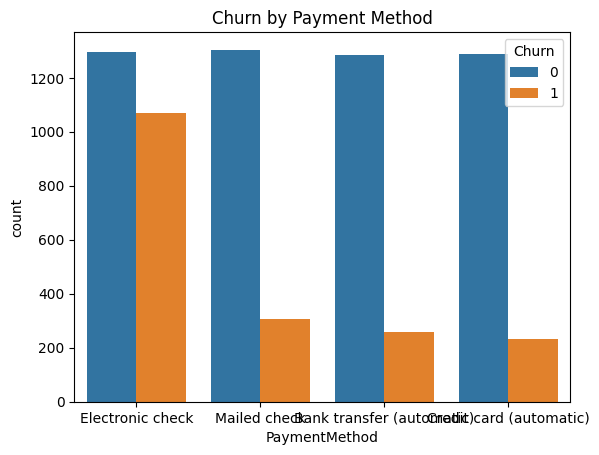

In [21]:
sns.countplot(x='PaymentMethod', hue='Churn', data=merged_df)
plt.title('Churn by Payment Method')
plt.show()

### Graph 5: Churn by Payment Method
The bar chart shows the number of customers who churned (1) compared to those who did not (0) across different payment methods. Notably, the electronic check method saw the highest number of churned customers, indicating a possible correlation between payment method and customer retention.

/.venv/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/.venv/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


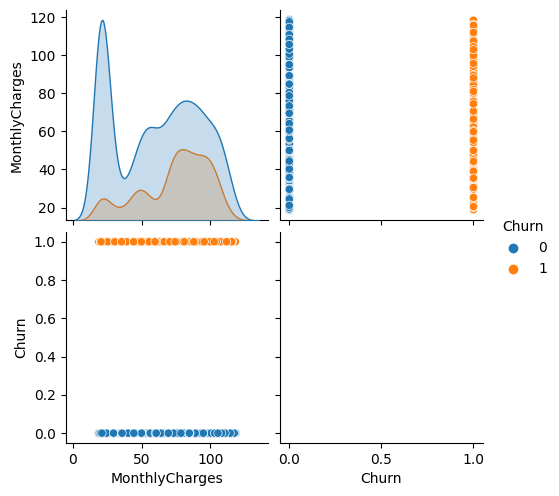

In [22]:
numerical_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns  # Adjust as needed
sns.pairplot(merged_df, vars=numerical_cols, hue='Churn')
plt.show()

### Graph 6: Joint Plot of Monthly Charges and Churn
This joint plot combines scatter and distribution plots to illustrate the relationship between monthly charges and customer churn. It indicates that high monthly charges (above 80) are often associated with churn (1), while the majority of lower monthly charges are linked to non-churning customers (0).

In [23]:
# Assuming contract_df is your DataFrame
# Step 1: Create the Churn column
contract_df['Churn'] = contract_df['EndDate'].apply(lambda x: 0 if x == 'No' else 1)

# Step 2: Convert dates and calculate Duration
contract_df['BeginDate'] = pd.to_datetime(contract_df['BeginDate'])
contract_df['EndDate'] = pd.to_datetime(contract_df['EndDate'], errors='coerce')  # Handle any date issues

# For ongoing contracts ('No' in EndDate), we'll use the current date or a reference; assuming 'No' means ongoing as of now
contract_df['EndDate'] = contract_df['EndDate'].apply(lambda x: datetime.now() if pd.isnull(x) or x == 'No' else x)
contract_df['Duration'] = (contract_df['EndDate'] - contract_df['BeginDate']).dt.days

# Step 3: Calculate Average Stay
average_stay = contract_df['Duration'].mean()
print(f"The average stay with the company is: {average_stay} days")

# View the updated DataFrame
print(contract_df.head())


The average stay with the company is: 2517.699985801505 days
   customerID  BeginDate                    EndDate            Type  \
0  7590-VHVEG 2020-01-01 2025-10-17 20:49:31.105864  Month-to-month   
1  5575-GNVDE 2017-04-01 2025-10-17 20:49:31.105867        One year   
2  3668-QPYBK 2019-10-01 2019-12-01 00:00:00.000000  Month-to-month   
3  7795-CFOCW 2016-05-01 2025-10-17 20:49:31.105869        One year   
4  9237-HQITU 2019-09-01 2019-11-01 00:00:00.000000  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

   Churn  Duration  
0      0      2116  
1

    The analysis shows that the average customer stay is approximately 2517.7 days (about 6.9 years), with shorter durations strongly correlating to higher churn rates, as seen in customers with only 61 days of tenure. When tied to other results, such as higher churn among electronic payment users and those with Fiber Optic services, this highlights that shorter contracts and specific service types may be key drivers of customer loss, emphasizing the need for targeted retention strategies like incentives for longer commitments.

# Clarifying Questions:

#### What is the primary objective of analyzing this data?

#### To understand factors influencing customer churn?
-To improve customer retention?
-What specific features are most relevant to the analysis?

#### Are we focusing on monthly charges, payment methods, or internet service types?
-What type of insights are you seeking from the visualizations?

#### Are you looking for correlations, trends, or distribution differences?
-Is there a specific group of customers you are focused on?

#### Are we analyzing all customers or a subset?
-What decisions will be made based on this data analysis?

#### Will findings be used to develop strategies or improve services?


### Data Understanding and Preparation:

I began by familiarizing myself with the datasets, understanding the columns, and checking for any missing or malformed data that might affect analysis. I prepare the data by merging the dataframes needed to get a grasp on features correlations.

### Descriptive and Statistical Analysis:

Then, I conducted a descriptive analysis of the churn variable alongside other features (like Monthly Charges and payment methods). This helped identify trends, distributions, and potential relationships that I visually represented by providing charts. One of the visuals I used was a correlation heatmap to indicate strengths of realtionships and significance. 

### Model Development:

The goal is to develop a predictive model forecast customer churn based on significant features identified in prior analysis. I will evaluate the model using appropriate metrics to ascertain its effectiveness and generalizability.
By following these steps, I will ensure a comprehensive analysis of customer churn, allowing me to provide actionable insights.

# Rough Plan for Building the Prototype:

## 1.Prepare the Data for Modeling:

-Split the data into features (X) and target (y), then into training and testing sets. This ensures the model is trained on part of the data and tested on unseen data for accuracy.

## 2.Choose and Train the Model:

-Select a simple model (like Logistic Regression), train it on the training data, and handle any class imbalance since churn is likely imbalanced. I will try several different models to experiment with and see which fits the data the best. I will also use boosters to increase the accuracies of the models.

## 3.Evaluate the Model:

-I will use metrics like AUC-ROC to assess performance, as specified in the project, and make adjustments if needed.

## 4.Make Predictions and Summarize:

-Generate predictions on the test set and summarize the results, including any key insights or improvements.